Automatically created module for IPython interactive environment


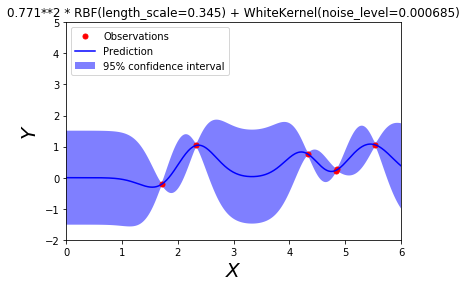

0.771**2 * RBF(length_scale=0.345) + WhiteKernel(noise_level=0.000685)


In [29]:
print(__doc__)

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

np.random.seed(1)

X = np.array([[1.71],
             [2.33],
             [4.33],
             [4.84],
             [4.86],
             [5.54]])
y = np.array([-0.2138,1.0389,0.7630,0.2271,0.2733,1.0565])

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T


# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
#plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.96 * sigma,
                        (y_pred + 1.96 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$X$',size = 20)
plt.ylabel('$Y$',size = 20)
plt.ylim(-2, 5)
plt.xlim(0,6)
plt.title(str(gp.kernel_))
plt.legend(loc='upper left')
plt.show()

print (gp.kernel_)